# STAT207 Mini-Project #2 - Predicting Fuel Consumption


Nolan Enright

In [373]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

In today's world, we are ever increasingly concerned about conserving energy in an attempt to protect our environment. Because of the urgency of this critical dilemma, it is super important to make accurate predictions. Thus, my project has a straightforward goal: Build a predictive model that will effectively predict Estimated Annual Petrolum Consumption (Barrels) for new datasets. To do this, I am going to use selected relevant explanatory variables like the car's make, model, year, fuel type, and vehicle class as well as numerical variables such as City MPG, Highway MPG, and Combined MPG.

Additionally, I also want to dig deeper and understand why things are the way they are by exploring the nature of the variables in the dataset.  In other words, we want to know why some cars use more barrels of petrol annually than others. Thus, enabling us to make smarter choices about our energy use and help protect our environment. This model is useful for governments in setting regulations on emission standards. Perhaps they could use this model to see which variables make a car more susceptible to being non-environmentally friendly. Additionally, buyers of cars can use this model to make the best economic and environmental decisions when buying a new car.

## 2. Dataset Discussion

The data set chosen is titled Vehicle MPG - 1984 to 2023 and was scraped from the US Department of Energy. It was posed to Kaggle by the user Maxwell and contains 26 columns and 45896 rows. Each column contains variables that describe the fuel economy of a specific car. For instance, each row is a unique car with a make, model, year, vehicle type, and engine type etc. Additionally, there are very useful numerical variables that are centered around fuel consumption. These variables will turn very useful in creation of my model.

In [374]:
df = pd.read_csv("Vehicle MPG - 1984 to 2023.csv")

In [375]:
df.head()

,ID,Model Year,Make,Model,Estimated Annual Petrolum Consumption (Barrels),Fuel Type 1,City MPG (Fuel Type 1),Highway MPG (Fuel Type 1),Combined MPG (Fuel Type 1),Fuel Type 2,...,Engine Description,Transmission,Vehicle Class,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2)
0,1,1985,Alfa Romeo,Spider Veloce 2000,14.167143,Regular Gasoline,19,25,21,NaN,...,(FFS),Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
1,2,1985,Bertone,X1/9,13.523182,Regular Gasoline,20,26,22,NaN,...,NaN,Manual 5-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
2,3,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,21,17,NaN,...,(350 V8) (FFS),Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
3,4,1985,Chevrolet,Corvette,17.500588,Regular Gasoline,15,20,17,NaN,...,(350 V8) (FFS),Manual 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0
4,5,1985,Nissan,300ZX,18.594375,Regular Gasoline,15,18,16,NaN,...,"(GUZZLER) (FFS,TRBO)",Automatic 4-spd,Two Seaters,0,0.0,0,0.0,0.0,0.0,0.0


In [376]:
df.shape[0]

45896

I accessed this dataset from Kaggle. 
Link: https://www.kaggle.com/datasets/mexwell/vehicle-mpg-1984-2023?select=Vehicle+MPG+-+1984+to+2023.csv
Date Downloaded: October 25th 2023

## 3. Dataset Cleaning

In pursuit of my research goal, I conducted data cleaning to streamline the dataset. The initial step involved identifying and removing extraneous variables that would not contribute to building an effective model and had the potential to disrupt it. Notable examples of such variables were "ID" and "Model." These variables were considered problematic for the model due to their uniqueness - each value was specific to only one row in the dataset. Since a predictive model relies on patterns and relationships between variables, using such unique identifiers would introduce noise and hinder the model's ability to make meaningful predictions. Subsequently, I observed a small portion of the dataset encompassing fully electric vehicles. Given that my primary aim was to predict petroleum consumption by automobiles, retaining electric cars in the model seemed counterproductive and likely to introduce bias into the results. As a result, I decided to exclude any entries with "fuel type = Electricity" from the dataset. Makes with less than 2000 vehicles and produced later than 2005 present on the list were removed as well to make the model more representative of the vehciles on the road currenly. 38189 vehicles were dropped in total. Names needed to include "_" in place of spaces in order to agree with the statsmodels.formula.api formula syntax.

In [377]:
df = df[{'Model Year', 'Make', 'Estimated Annual Petrolum Consumption (Barrels)', 'Fuel Type 1', 
         'City MPG (Fuel Type 1)', 'Highway MPG (Fuel Type 1)','Combined MPG (Fuel Type 1)',
           'Vehicle Class'}]
df.head()

/var/folders/9w/4bhm6y311mxccw3ds9zfltn80000gn/T/ipykernel_16394/2154985592.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[{'Model Year', 'Make', 'Estimated Annual Petrolum Consumption (Barrels)', 'Fuel Type 1',


,Make,City MPG (Fuel Type 1),Fuel Type 1,Model Year,Estimated Annual Petrolum Consumption (Barrels),Vehicle Class,Highway MPG (Fuel Type 1),Combined MPG (Fuel Type 1)
0,Alfa Romeo,19,Regular Gasoline,1985,14.167143,Two Seaters,25,21
1,Bertone,20,Regular Gasoline,1985,13.523182,Two Seaters,26,22
2,Chevrolet,15,Regular Gasoline,1985,17.500588,Two Seaters,21,17
3,Chevrolet,15,Regular Gasoline,1985,17.500588,Two Seaters,20,17
4,Nissan,15,Regular Gasoline,1985,18.594375,Two Seaters,18,16


In [378]:
df= df.replace('Electricity', np.nan)
df_dropped = df.dropna()
df_dropped = df_dropped.rename(columns={'Vehicle Class': 'Vehicle_Class'})
df_dropped = df_dropped.rename(columns={'Combined MPG (Fuel Type 1)': 'Combined_MPG'})
df_dropped = df_dropped.rename(columns={'Highway MPG (Fuel Type 1)': 'Highway_MPG'})
df_dropped = df_dropped.rename(columns={'City MPG (Fuel Type 1)': 'City_MPG'})
df_dropped = df_dropped.rename(columns={'Fuel Type 1': 'Fuel_Type'})
df_dropped = df_dropped.rename(columns={'Estimated Annual Petrolum Consumption (Barrels)': 'Estimated_Annual_Petrolum_Consumption_Barrels'})
df_dropped = df_dropped.rename(columns={'Model Year': 'Model_Year'})
df_dropped


,Make,City_MPG,Fuel_Type,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Vehicle_Class,Highway_MPG,Combined_MPG
0,Alfa Romeo,19,Regular Gasoline,1985,14.167143,Two Seaters,25,21
1,Bertone,20,Regular Gasoline,1985,13.523182,Two Seaters,26,22
2,Chevrolet,15,Regular Gasoline,1985,17.500588,Two Seaters,21,17
3,Chevrolet,15,Regular Gasoline,1985,17.500588,Two Seaters,20,17
4,Nissan,15,Regular Gasoline,1985,18.594375,Two Seaters,18,16
...,...,...,...,...,...,...,...,...
45885,Toyota,42,Regular Gasoline,2023,7.256341,Midsize Cars,41,41
45886,Mercedes-Benz,16,Premium Gasoline,2023,15.658421,Midsize Station Wagons,24,19
45887,Ford,27,Regular Gasoline,2023,9.917000,Small Sport Utility Vehicle 2WD,34,30
45888,Ford,42,Regular Gasoline,2023,7.628462,Small Sport Utility Vehicle 2WD,36,39


In [379]:
make_counts = df_dropped['Make'].value_counts()
make_counts


Chevrolet           4319
Ford                3656
GMC                 2722
Dodge               2676
Toyota              2315
                    ... 
General Motors         1
Goldacre               1
Isis Imports Ltd       1
Shelby                 1
Aurora Cars Ltd        1
Name: Make, Length: 134, dtype: int64

In [380]:
make_counts = df_dropped['Make'].value_counts()

df_dropped = df_dropped.groupby('Make').filter(lambda x: len(x) >= 2000)
df_dropped = df_dropped[df_dropped['Model_Year'] >= 2005]
df_dropped

,Make,City_MPG,Fuel_Type,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Vehicle_Class,Highway_MPG,Combined_MPG
20454,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,26,21
20455,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,26,21
20456,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,27,21
20457,BMW,17,Premium Gasoline,2005,14.875500,Two Seaters,25,20
20458,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,27,21
...,...,...,...,...,...,...,...,...
45859,Toyota,29,Regular Gasoline,2023,9.917000,Small Sport Utility Vehicle 4WD,32,30
45884,Toyota,29,Regular Gasoline,2023,9.917000,Midsize Cars,32,30
45885,Toyota,42,Regular Gasoline,2023,7.256341,Midsize Cars,41,41
45887,Ford,27,Regular Gasoline,2023,9.917000,Small Sport Utility Vehicle 2WD,34,30


In [381]:
df.shape[0] - df_dropped.shape[0]

38189

## 4. Preliminary Analysis

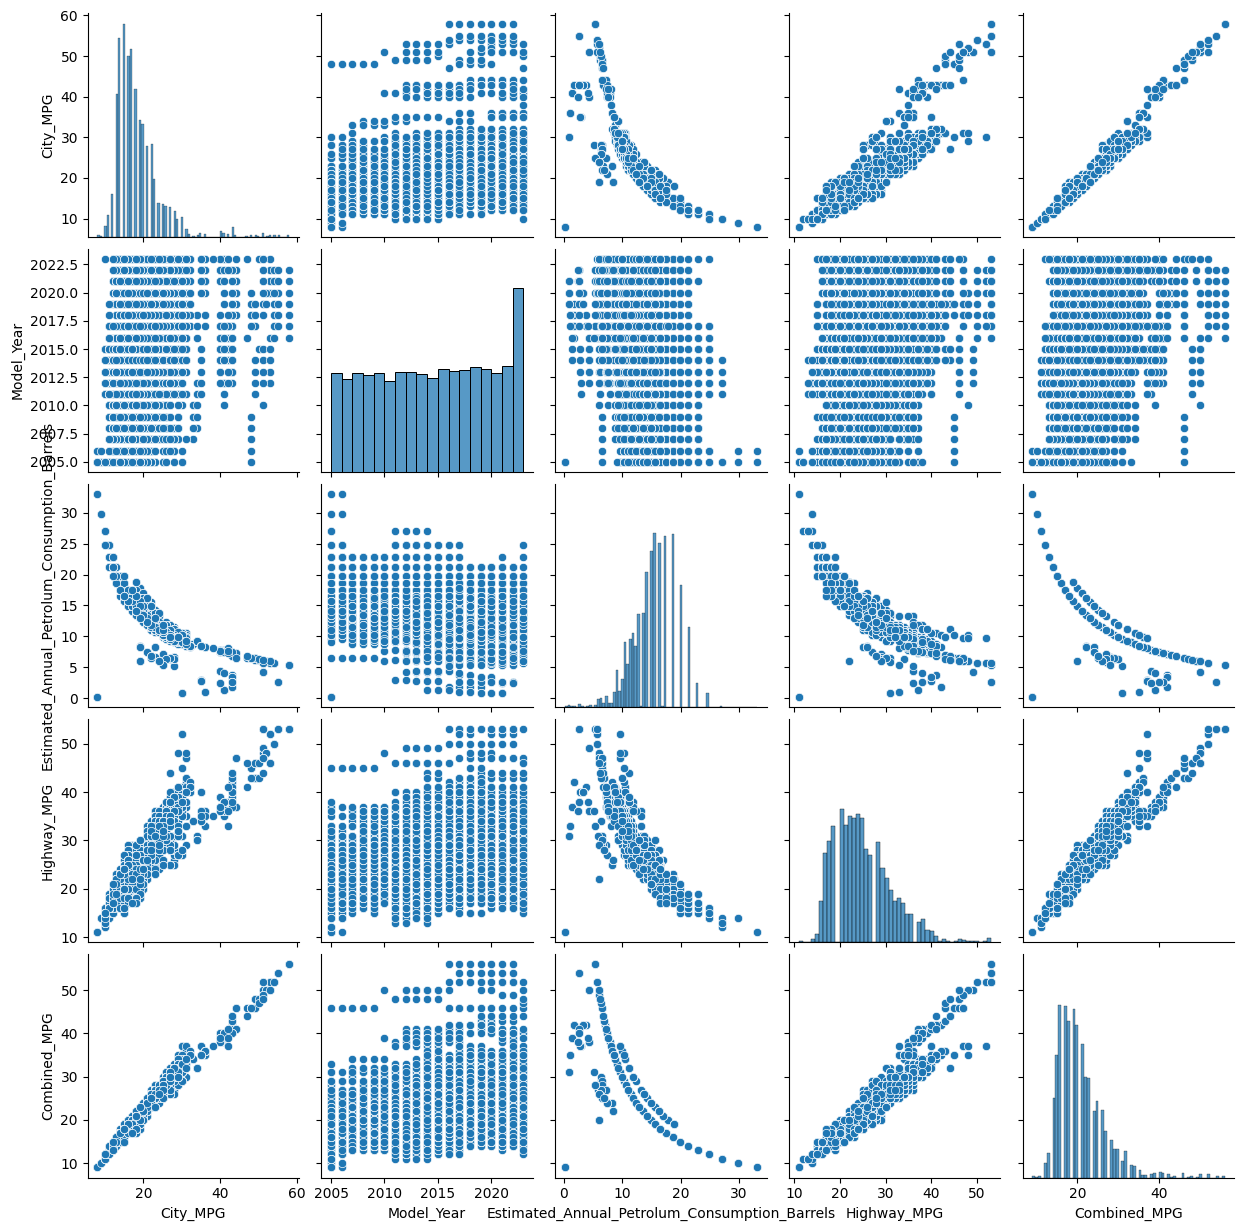

In [382]:
sns.pairplot(data=df_dropped)

In [383]:
import statsmodels.formula.api as smf

lin_mod = smf.ols(formula="Estimated_Annual_Petrolum_Consumption_Barrels~Make+City_MPG+Fuel_Type+Model_Year+Vehicle_Class+Highway_MPG+Combined_MPG", data=df_dropped).fit()
lin_mod.summary().tables[1]



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,82.0706,5.849,14.033,0.000,70.606,93.535
Make[T.Chevrolet],0.7771,0.060,12.865,0.000,0.659,0.896
Make[T.Dodge],0.8705,0.068,12.861,0.000,0.738,1.003
Make[T.Ford],0.4947,0.066,7.485,0.000,0.365,0.624
Make[T.GMC],0.8638,0.068,12.643,0.000,0.730,0.998
Make[T.Toyota],1.0271,0.069,14.923,0.000,0.892,1.162
Fuel_Type[T.Midgrade Gasoline],-2.5330,0.180,-14.063,0.000,-2.886,-2.180
Fuel_Type[T.Natural Gas],-25.4487,0.564,-45.107,0.000,-26.555,-24.343
Fuel_Type[T.Premium Gasoline],-2.3754,0.106,-22.397,0.000,-2.583,-2.167
Fuel_Type[T.Regular Gasoline],-2.7266,0.097,-28.122,0.000,-2.917,-2.537


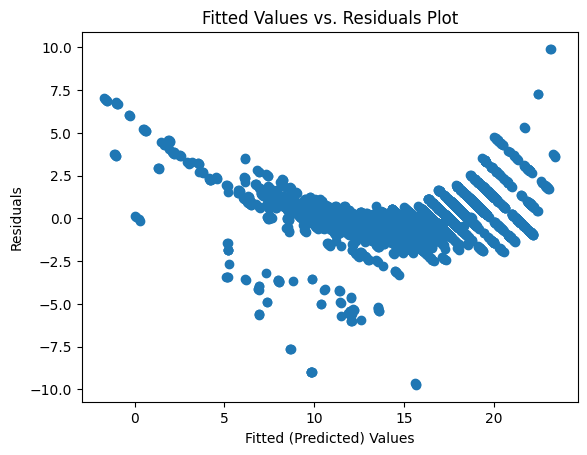

In [384]:
plt.scatter(lin_mod.fittedvalues, lin_mod.resid)
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals Plot")
plt.show()

The linearity assumption is not met and therefore the linear regression model is not the most suitable type of model to use to accurately describe this dataset. However, by transforming the Estimated_Annual_Petrolum_Consumption_Barrels with the MPG variables by using a logarithmic transformation may achieve a better fit.

In [385]:
df_dropped["ln_Highway_MPG"] = np.log(df_dropped["Highway_MPG"])
df_dropped["ln_City_MPG"] = np.log(df_dropped["City_MPG"])
df_dropped["ln_Combined_MPG"] = np.log(df_dropped["Combined_MPG"])
df_dropped['ln_Estimated_Annual_Petrolum_Consumption_Barrels'] = np.log(df_dropped["Estimated_Annual_Petrolum_Consumption_Barrels"])
df_dropped.head()

,Make,City_MPG,Fuel_Type,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Vehicle_Class,Highway_MPG,Combined_MPG,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,ln_Estimated_Annual_Petrolum_Consumption_Barrels
20454,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,26,21,3.258097,2.890372,3.044522,2.650925
20455,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,26,21,3.258097,2.890372,3.044522,2.650925
20456,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,27,21,3.295837,2.890372,3.044522,2.650925
20457,BMW,17,Premium Gasoline,2005,14.875500,Two Seaters,25,20,3.218876,2.833213,2.995732,2.699716
20458,BMW,18,Premium Gasoline,2005,14.167143,Two Seaters,27,21,3.295837,2.890372,3.044522,2.650925


In [386]:
ln_lin_mod = smf.ols(formula="ln_Estimated_Annual_Petrolum_Consumption_Barrels~Make+ln_City_MPG+Fuel_Type+Model_Year+Vehicle_Class+ln_Highway_MPG+ln_Combined_MPG", data=df_dropped).fit()
ln_lin_mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.5723,0.564,9.871,0.000,4.466,6.679
Make[T.Chevrolet],-0.0050,0.006,-0.860,0.390,-0.016,0.006
Make[T.Dodge],-0.0148,0.007,-2.256,0.024,-0.028,-0.002
Make[T.Ford],0.0024,0.006,0.377,0.706,-0.010,0.015
Make[T.GMC],-0.0044,0.007,-0.665,0.506,-0.017,0.009
Make[T.Toyota],0.0327,0.007,4.937,0.000,0.020,0.046
Fuel_Type[T.Midgrade Gasoline],-0.2269,0.017,-13.071,0.000,-0.261,-0.193
Fuel_Type[T.Natural Gas],-5.5452,0.055,-101.459,0.000,-5.652,-5.438
Fuel_Type[T.Premium Gasoline],-0.2261,0.010,-22.250,0.000,-0.246,-0.206
Fuel_Type[T.Regular Gasoline],-0.1945,0.009,-20.902,0.000,-0.213,-0.176


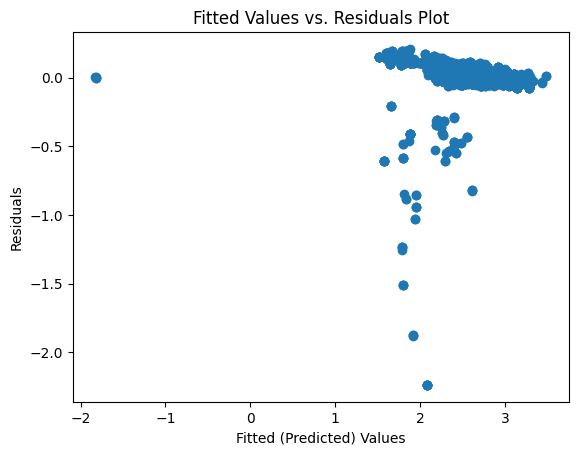

In [387]:
plt.scatter(ln_lin_mod.fittedvalues, ln_lin_mod.resid)
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals Plot")
plt.show()

The linearity assumption is much closer to being fit with the transformed model. This model which predicts the ln(Estimated_Annual_Petrolum_Consumption_Barrels) is a more suitable type of model to represent the relationship between the explanatory variables and the response variable.

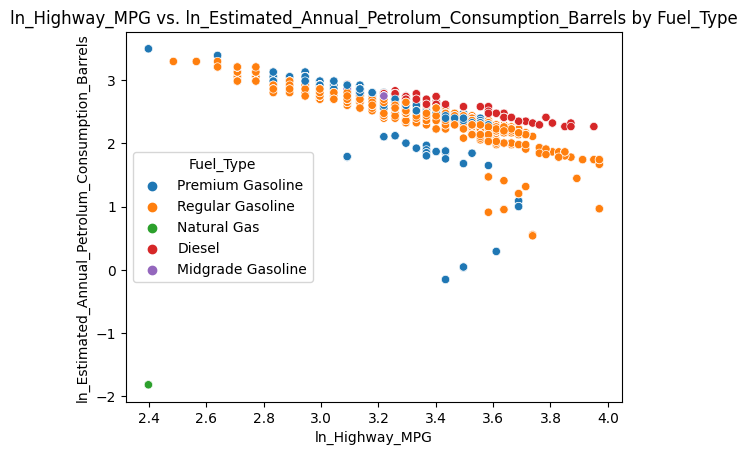

In [388]:
sns.scatterplot(data=df_dropped, x='ln_Highway_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Fuel_Type')
plt.xlabel("ln_Highway_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Highway_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Fuel_Type")
plt.legend(title='Fuel_Type')
plt.show()

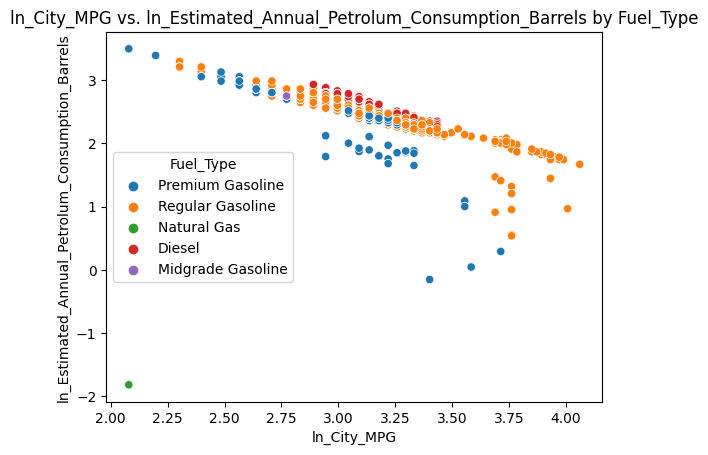

In [389]:
sns.scatterplot(data=df_dropped, x='ln_City_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Fuel_Type')
plt.xlabel("ln_City_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_City_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Fuel_Type")
plt.legend(title='Fuel_Type')
plt.show()

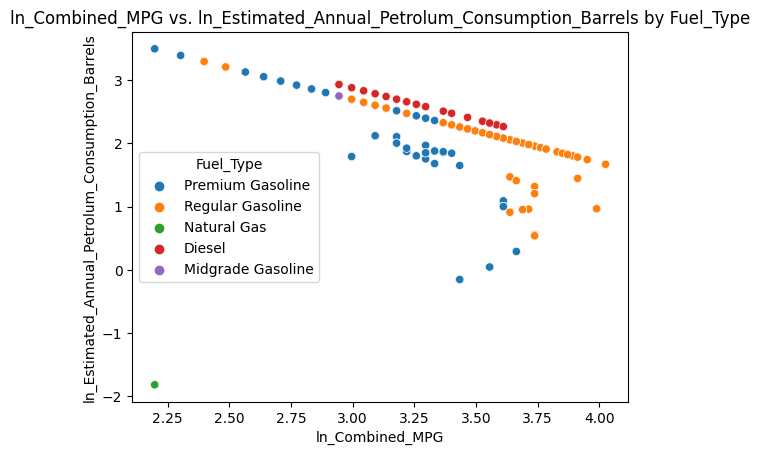

In [390]:
sns.scatterplot(data=df_dropped, x='ln_Combined_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Fuel_Type')
plt.xlabel("ln_Combined_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Combined_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Fuel_Type")
plt.legend(title='Fuel_Type')
plt.show()

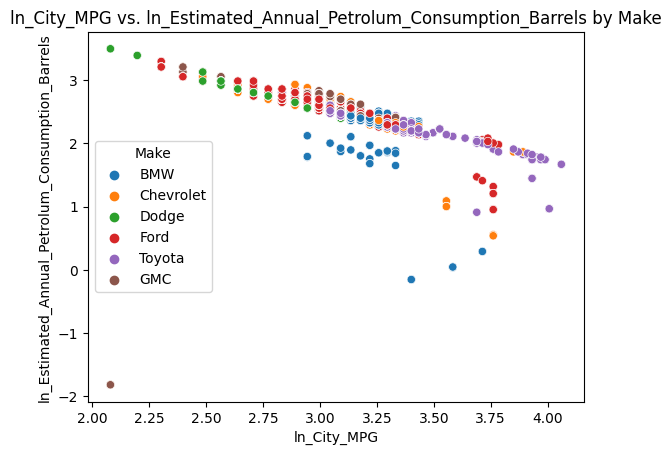

In [391]:
sns.scatterplot(data=df_dropped, x='ln_City_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Make')
plt.xlabel("ln_City_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_City_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Make")
plt.legend(title='Make')
plt.show()

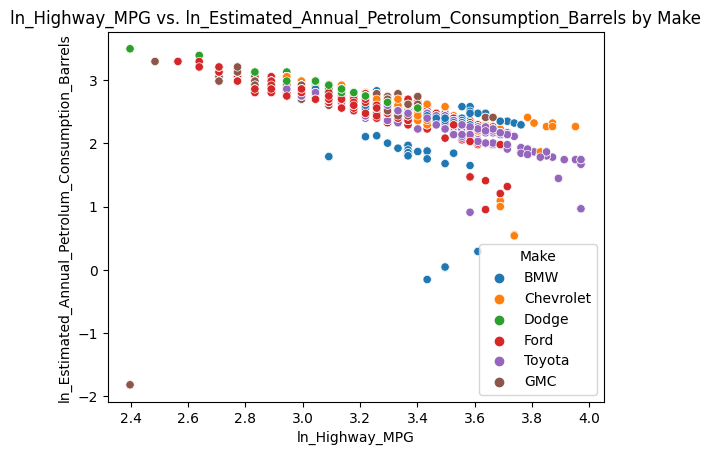

In [392]:
sns.scatterplot(data=df_dropped, x='ln_Highway_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Make')
plt.xlabel("ln_Highway_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Highway_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Make")
plt.legend(title='Make')
plt.show()

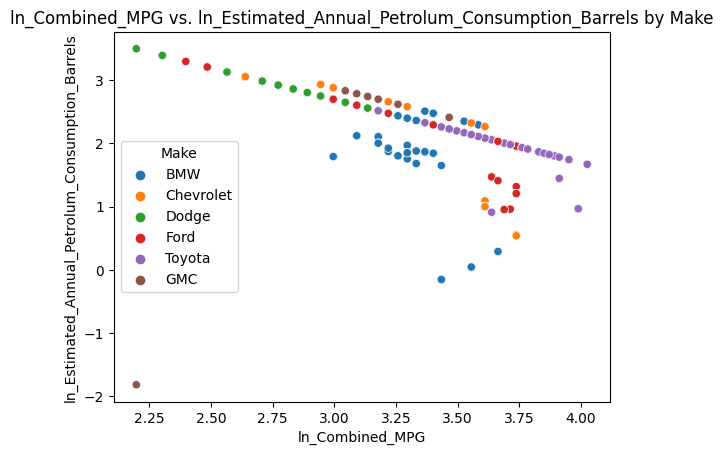

In [393]:
sns.scatterplot(data=df_dropped, x='ln_Combined_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Make')
plt.xlabel("ln_Combined_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Combined_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Make")
plt.legend(title='Make')
plt.show()

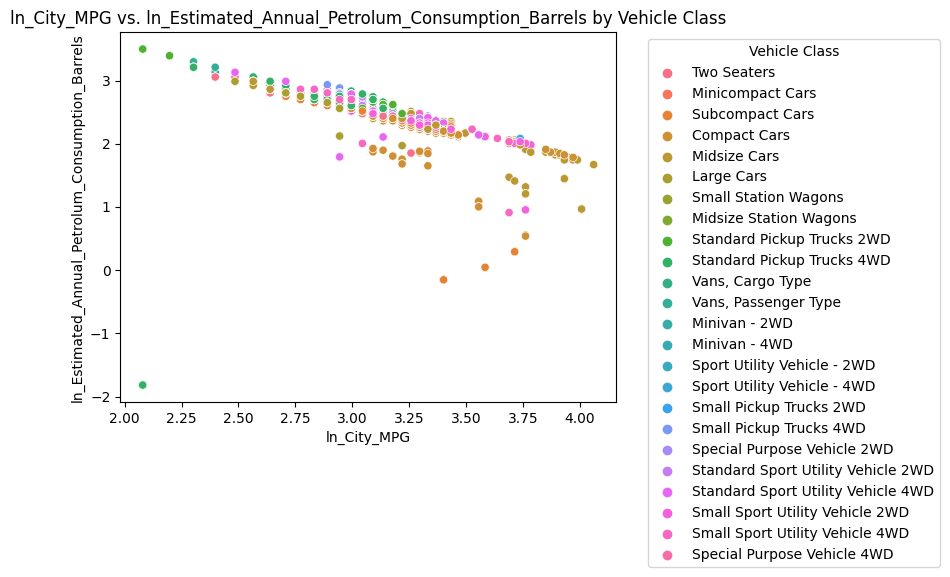

In [394]:
sns.scatterplot(data=df_dropped, x='ln_City_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Vehicle_Class')
plt.xlabel("ln_City_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_City_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Vehicle Class")
plt.legend(title='Vehicle Class',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

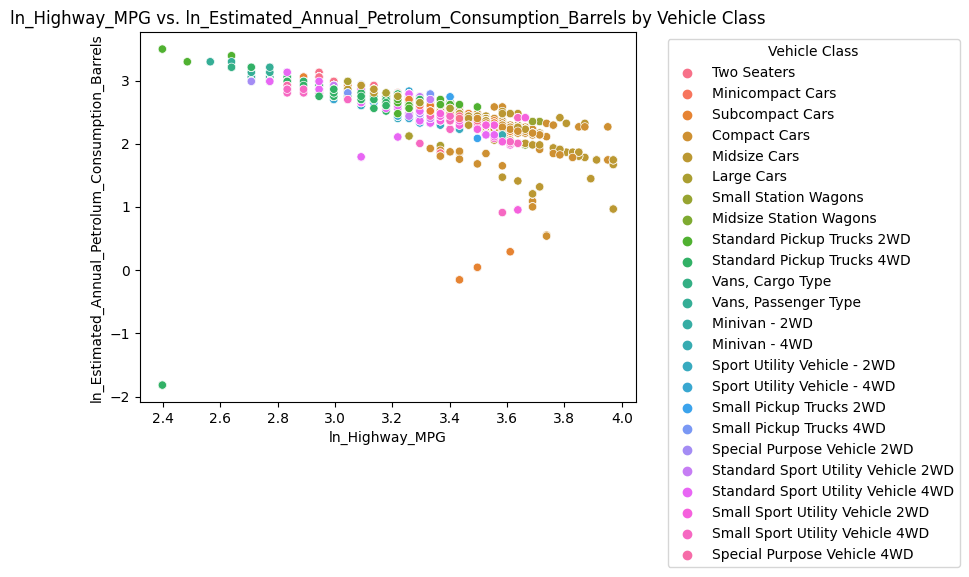

In [395]:
sns.scatterplot(data=df_dropped, x='ln_Highway_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Vehicle_Class')
plt.xlabel("ln_Highway_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Highway_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Vehicle Class")
plt.legend(title='Vehicle Class',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

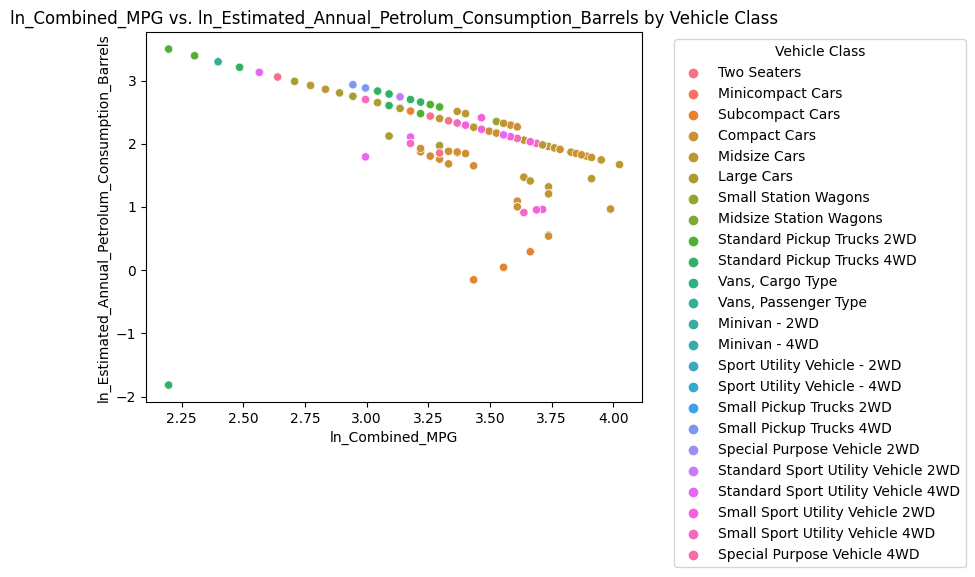

In [396]:
sns.scatterplot(data=df_dropped, x='ln_Combined_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Vehicle_Class')
plt.xlabel("ln_Combined_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Combined_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Vehicle Class")
plt.legend(title='Vehicle Class',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

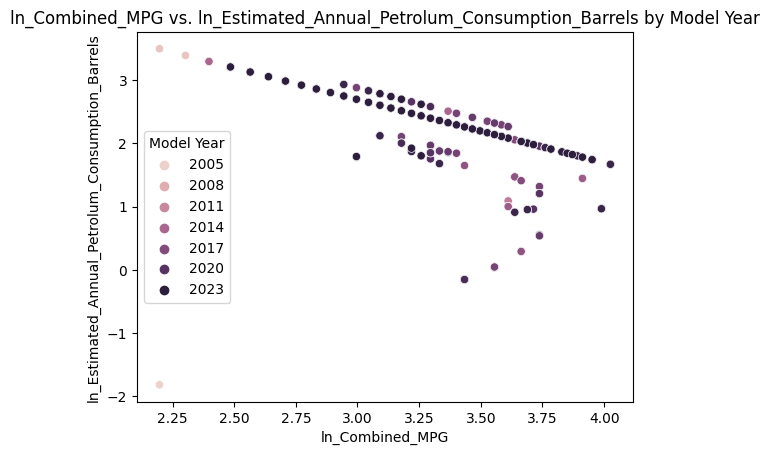

In [397]:
sns.scatterplot(data=df_dropped, x='ln_Combined_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Model_Year')
plt.xlabel("ln_Combined_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Combined_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Model Year")
plt.legend(title='Model Year')
plt.show()

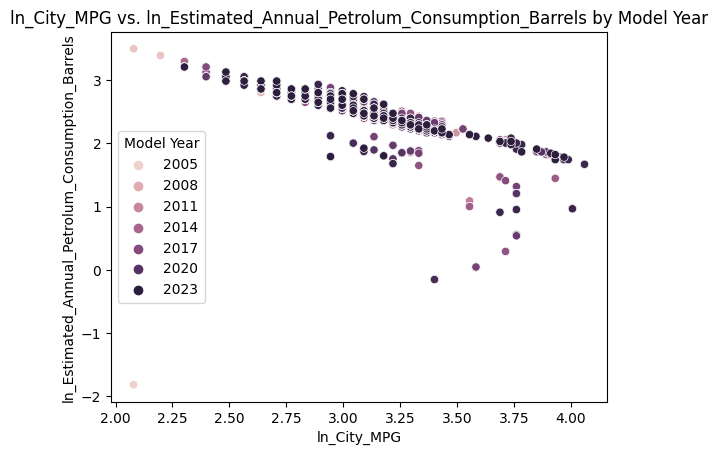

In [398]:
sns.scatterplot(data=df_dropped, x='ln_City_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Model_Year')
plt.xlabel("ln_City_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_City_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Model Year")
plt.legend(title='Model Year')
plt.show()

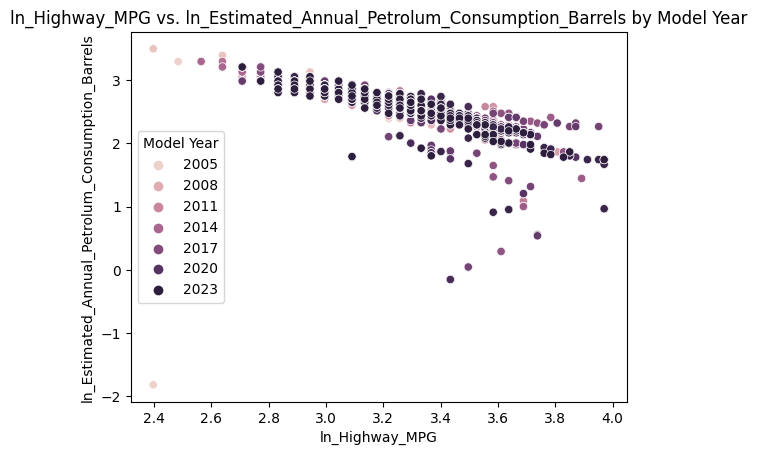

In [399]:
sns.scatterplot(data=df_dropped, x='ln_Highway_MPG', y='ln_Estimated_Annual_Petrolum_Consumption_Barrels', hue='Model_Year')
plt.xlabel("ln_Highway_MPG")
plt.ylabel("ln_Estimated_Annual_Petrolum_Consumption_Barrels")
plt.title("ln_Highway_MPG vs. ln_Estimated_Annual_Petrolum_Consumption_Barrels by Model Year")
plt.legend(title='Model Year')
plt.show()

The plots suggest that there are large interactions between MPG (highway, city, and combined) and each categorical variable in predicting ln_Estimated_Annual_Petrolum_Consumption_Barrels. The most notable interaction was in the fuel type and vehicle class. Under further study, I was able to determine visually that compact and midsize car vehicle classes as well as regular gasoline vehicles were more likely to have less annual barrel consumption and higher MPG.

## 5. Predictive Models

In [400]:
df_with_ind = pd.get_dummies(df_dropped, drop_first=True)
df_with_ind

,City_MPG,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Highway_MPG,Combined_MPG,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,ln_Estimated_Annual_Petrolum_Consumption_Barrels,Make_Chevrolet,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
20454,18,2005,14.167143,26,21,3.258097,2.890372,3.044522,2.650925,0,...,0,0,0,0,0,0,0,1,0,0
20455,18,2005,14.167143,26,21,3.258097,2.890372,3.044522,2.650925,0,...,0,0,0,0,0,0,0,1,0,0
20456,18,2005,14.167143,27,21,3.295837,2.890372,3.044522,2.650925,0,...,0,0,0,0,0,0,0,1,0,0
20457,17,2005,14.875500,25,20,3.218876,2.833213,2.995732,2.699716,0,...,0,0,0,0,0,0,0,1,0,0
20458,18,2005,14.167143,27,21,3.295837,2.890372,3.044522,2.650925,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45859,29,2023,9.917000,32,30,3.465736,3.367296,3.401197,2.294250,0,...,0,0,0,0,0,0,0,0,0,0
45884,29,2023,9.917000,32,30,3.465736,3.367296,3.401197,2.294250,0,...,0,0,0,0,0,0,0,0,0,0
45885,42,2023,7.256341,41,41,3.713572,3.737670,3.713572,1.981876,0,...,0,0,0,0,0,0,0,0,0,0
45887,27,2023,9.917000,34,30,3.526361,3.295837,3.401197,2.294250,0,...,0,0,0,0,0,0,0,0,0,0


Changing our categorical variables into dummies.

In [401]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_with_ind, test_size=0.8, random_state=100)
train_df

,City_MPG,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Highway_MPG,Combined_MPG,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,ln_Estimated_Annual_Petrolum_Consumption_Barrels,Make_Chevrolet,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
40758,15,2019,17.500588,21,17,3.044522,2.708050,2.833213,2.862234,0,...,0,0,0,0,0,1,0,0,0,0
36379,17,2016,14.875500,26,20,3.258097,2.833213,2.995732,2.699716,0,...,0,0,0,0,0,0,0,0,0,0
22250,13,2006,19.834000,18,15,2.890372,2.564949,2.708050,2.987398,0,...,0,0,0,1,0,0,0,0,0,0
40135,17,2019,15.658421,23,19,3.135494,2.833213,2.944439,2.751009,1,...,0,0,1,0,0,0,0,0,0,0
31597,13,2012,21.250714,16,14,2.772589,2.564949,2.639057,3.056391,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,28,2005,9.597097,37,31,3.610918,3.332205,3.433987,2.261461,0,...,0,0,0,0,0,0,0,0,0,0
34165,21,2014,12.396250,30,24,3.401197,3.044522,3.178054,2.517394,0,...,0,0,0,0,0,0,0,0,0,0
40364,19,2019,14.875500,22,20,3.091042,2.944439,2.995732,2.699716,0,...,0,0,0,0,0,0,0,0,0,0
43507,29,2022,9.297187,37,32,3.610918,3.367296,3.465736,2.229712,1,...,0,0,0,0,0,0,1,0,0,0


Spliting the data into training and testing dataframes.

In [402]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df_scaled = train_df.copy()
train_df_scaled[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
train_df_scaled

,City_MPG,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Highway_MPG,Combined_MPG,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,ln_Estimated_Annual_Petrolum_Consumption_Barrels,Make_Chevrolet,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
40758,-0.577243,0.904804,0.601411,-0.621754,-0.636839,-0.587992,-0.617195,-0.655830,0.591756,0,...,0,0,0,0,0,1,0,0,0,0
36379,-0.259326,0.348936,-0.081664,0.162436,-0.151813,0.292020,-0.171121,-0.035331,0.060310,0,...,0,0,0,0,0,0,0,0,0,0
22250,-0.895161,-1.503959,1.208589,-1.092268,-0.960190,-1.223155,-1.127198,-1.133705,1.001047,0,...,0,0,0,1,0,0,0,0,0,0
40135,-0.259326,0.904804,0.122060,-0.308078,-0.313489,-0.213151,-0.171121,-0.231169,0.228042,1,...,0,0,1,0,0,0,0,0,0,0
31597,-0.895161,-0.392222,1.577232,-1.405943,-1.121865,-1.708469,-1.127198,-1.397120,1.226657,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,1.489218,-1.689249,-1.455159,1.887653,1.626615,1.745787,1.607255,1.637933,-1.372809,0,...,0,0,0,0,0,0,0,0,0,0
34165,0.376508,-0.021643,-0.726791,0.789787,0.494888,0.881653,0.581973,0.660776,-0.535892,0,...,0,0,0,0,0,0,0,0,0,0
40364,0.058591,0.904804,-0.081664,-0.464916,-0.151813,-0.396310,0.225281,-0.035331,0.060310,0,...,0,0,0,0,0,0,0,0,0,0
43507,1.648177,1.460673,-1.533199,1.887653,1.788290,1.745787,1.732319,1.759150,-1.476629,1,...,0,0,0,0,0,0,1,0,0,0


Scaling the training dataframe.

In [403]:
scaled_test_df = test_df.copy() 
scaled_test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])
scaled_test_df


,City_MPG,Model_Year,Estimated_Annual_Petrolum_Consumption_Barrels,Highway_MPG,Combined_MPG,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,ln_Estimated_Annual_Petrolum_Consumption_Barrels,Make_Chevrolet,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
45441,0.058591,1.645962,-0.081664,-0.464916,-0.151813,-0.396310,0.225281,-0.035331,0.060310,0,...,0,0,0,1,0,0,0,0,0,0
30761,-1.213078,-0.577512,2.498842,-1.719619,-1.445216,-2.258672,-1.722569,-1.985670,1.730739,0,...,0,0,0,1,0,0,0,0,0,0
43654,1.966094,1.460673,-1.675506,2.044491,2.111641,1.855671,1.970003,1.990615,-1.674875,0,...,0,0,0,0,0,0,0,0,0,0
38671,4.668390,0.719515,-2.269484,2.828680,4.051745,2.365010,3.528208,3.144728,-2.663351,0,...,0,0,0,0,0,0,0,0,0,0
22810,-0.577243,-1.318670,0.886026,-1.092268,-0.798514,-1.223155,-0.617195,-0.887296,0.790002,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42518,0.217549,1.275383,-0.586546,0.319274,0.333213,0.447525,0.408088,0.498282,-0.396720,0,...,0,0,0,0,0,0,1,0,0,0
26052,-0.577243,-0.948091,0.601411,-0.621754,-0.636839,-0.587992,-0.617195,-0.655830,0.591756,0,...,1,0,0,0,0,0,0,0,0,0
32119,-0.895161,-0.206933,1.577232,-1.092268,-1.121865,-1.223155,-1.127198,-1.397120,1.226657,1,...,0,0,1,0,0,0,0,0,0,0
44206,-0.418285,1.460673,0.601411,-1.092268,-0.636839,-1.223155,-0.387183,-0.655830,0.591756,0,...,0,0,0,1,0,0,0,0,0,0


Scaling the testing dataframe.

In [404]:
ln_lin_mod = smf.ols(formula="ln_Estimated_Annual_Petrolum_Consumption_Barrels~Make+ln_City_MPG+Fuel_Type+Model_Year+Vehicle_Class+ln_Highway_MPG+ln_Combined_MPG", data=df_dropped).fit()
ln_lin_mod.rsquared

0.8841081645213601

This is the Non-Regularized Linear Regression Full Model, it returned an r squared of 0.8841081645213601.

In [405]:
ln_lin_mod_with_interaction = smf.ols(formula="ln_Estimated_Annual_Petrolum_Consumption_Barrels~Make+ln_City_MPG+Fuel_Type+Model_Year+ln_Highway_MPG+ln_Combined_MPG*Vehicle_Class", data=df_dropped).fit()
ln_lin_mod_with_interaction.rsquared

0.8879987333770273

This is the Non-Regularized Linear Regression Full Model with Interaction Terms of ln_Combined_MPG and Vehicle class, it returned a slightly higher r squared of 0.8879987333770273.

In [406]:
variables_to_drop = ['Estimated_Annual_Petrolum_Consumption_Barrels', 'Highway_MPG', 'Combined_MPG', 'City_MPG']
df_with_ind = df_with_ind.drop(variables_to_drop,axis=1)
train_df_scaled = train_df_scaled.drop(variables_to_drop, axis=1)
scaled_test_df = scaled_test_df.drop(variables_to_drop, axis=1)

Dropping the non-transformed variables. Since we want to use the natural log variants in our model.

In [407]:
training_features = train_df_scaled.drop(['ln_Estimated_Annual_Petrolum_Consumption_Barrels'], axis=1)
training_features.head()

,Model_Year,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,Make_Toyota,Fuel_Type_Midgrade Gasoline,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
40758,0.904804,-0.587992,-0.617195,-0.655830,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36379,0.348936,0.292020,-0.171121,-0.035331,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22250,-1.503959,-1.223155,-1.127198,-1.133705,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40135,0.904804,-0.213151,-0.171121,-0.231169,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31597,-0.392222,-1.708469,-1.127198,-1.397120,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [408]:
training_target = train_df_scaled["ln_Estimated_Annual_Petrolum_Consumption_Barrels"]
training_target.head()

40758    0.591756
36379    0.060310
22250    1.001047
40135    0.228042
31597    1.226657
Name: ln_Estimated_Annual_Petrolum_Consumption_Barrels, dtype: float64

In [409]:
test_features = scaled_test_df.drop(['ln_Estimated_Annual_Petrolum_Consumption_Barrels'], axis=1)
test_features.head()

,Model_Year,ln_Highway_MPG,ln_City_MPG,ln_Combined_MPG,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,Make_Toyota,Fuel_Type_Midgrade Gasoline,...,Vehicle_Class_Sport Utility Vehicle - 2WD,Vehicle_Class_Sport Utility Vehicle - 4WD,Vehicle_Class_Standard Pickup Trucks 2WD,Vehicle_Class_Standard Pickup Trucks 4WD,Vehicle_Class_Standard Sport Utility Vehicle 2WD,Vehicle_Class_Standard Sport Utility Vehicle 4WD,Vehicle_Class_Subcompact Cars,Vehicle_Class_Two Seaters,"Vehicle_Class_Vans, Cargo Type","Vehicle_Class_Vans, Passenger Type"
45441,1.645962,-0.396310,0.225281,-0.035331,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
30761,-0.577512,-2.258672,-1.722569,-1.985670,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
43654,1.460673,1.855671,1.970003,1.990615,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38671,0.719515,2.365010,3.528208,3.144728,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22810,-1.318670,-1.223155,-0.617195,-0.887296,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [410]:
test_target = scaled_test_df['ln_Estimated_Annual_Petrolum_Consumption_Barrels']
test_target.head()

45441    0.060310
30761    1.730739
43654   -1.674875
38671   -2.663351
22810    0.790002
Name: ln_Estimated_Annual_Petrolum_Consumption_Barrels, dtype: float64

In [411]:
from sklearn.linear_model import Lasso

temp_list=[]
for i in np.arange(0,0.505,0.005):
    lasso = Lasso(alpha=i, max_iter=1000)
    lasso.fit(training_features, training_target)

    r2 = lasso.score(test_features, test_target)
    temp_list.append({'Lambda': i, 'Test_R2': r2})


df_output = pd.DataFrame(temp_list, columns=['Lambda', 'Test_R2'])
df_output

/var/folders/9w/4bhm6y311mxccw3ds9zfltn80000gn/T/ipykernel_16394/3274221322.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(training_features, training_target)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+02, tolerance: 1.541e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers 

,Lambda,Test_R2
0,0.000,0.685592
1,0.005,0.690441
2,0.010,0.690322
3,0.015,0.690452
4,0.020,0.690322
...,...,...
96,0.480,0.512341
97,0.485,0.508369
98,0.490,0.504352
99,0.495,0.500292


100 iterations of my Lasso Model from 0 to 0.5 lambda values.

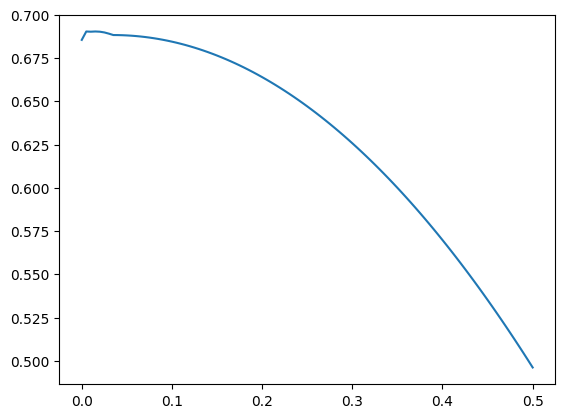

In [412]:
plt.plot(df_output["Lambda"].values, df_output['Test_R2'].values)

In [413]:
maxR2_index_1 = df_output['Test_R2'].idxmax()

row_with_maxR2_1 = df_output.loc[maxR2_index_1]

row_with_maxR2_1

Lambda     0.015000
Test_R2    0.690452
Name: 3, dtype: float64

The model that performs the best when predicting ln_Estimated_Annual_Petrolum_Consumption_Barrels is the Lasso model with lambda 0.015 as it returns the highest test r squared of 0.690452.

In [414]:
lasso_mod_015 = Lasso(alpha=0.015, max_iter=1000)
lasso_mod_015.fit(training_features, training_target)

Lasso(alpha=0.015)

In [415]:
df_slopes = pd.DataFrame({'Explanatory Variable': training_features.columns,'lasso_mod_0.015': lasso_mod_015.coef_})
df_slopes

,Explanatory Variable,lasso_mod_0.015
0,Model_Year,-0.000000
1,ln_Highway_MPG,-0.000000
2,ln_City_MPG,-0.511441
3,ln_Combined_MPG,-0.395796
4,Make_Chevrolet,-0.000000
5,Make_Dodge,-0.000000
6,Make_Ford,0.000000
7,Make_GMC,0.000000
8,Make_Toyota,0.000000
9,Fuel_Type_Midgrade Gasoline,-0.000000


In [416]:
lasso_mod_015.intercept_

0.029285415010902975

## 6. Best Model Discussion

\begin{align*}
\hat{ln\_Estimated\_Annual\_Petrolum\_Consumption\_Barrels} = & 0.0292854\\
& - 0.511441 \cdot \text{ln\_City\_MPG} \\
& - 0.395796 \cdot \text{ln\_Combined\_MPG} \\
& - 0.102799 \cdot \text{Fuel\_Type Premium Gasoline} \\
\end{align*}
\]


In [432]:
training_features[['ln_City_MPG', 'ln_Combined_MPG', "Fuel_Type_Premium Gasoline"]].corr()

,ln_City_MPG,ln_Combined_MPG,Fuel_Type_Premium Gasoline
ln_City_MPG,1.000000,0.986690,-0.035159
ln_Combined_MPG,0.986690,1.000000,0.010546
Fuel_Type_Premium Gasoline,-0.035159,0.010546,1.000000


Drawing insights from the real world, it's evident that miles per gallon has a significant impact on annual barrels of petroleum consumption. MPG, serving as a indicator for fuel efficiency, naturally suggests that vehicles with higher MPG ratings tend to exhibit lower annual petroleum consumption, a fact confirmed by the Lasso model's negative slope coefficients for the explanatory variables. There was no issue with multicollinearity, with only one variable pair, ln_City_MPG and ln_Combined_MPG, surpassing the threshold of 0.7. It appears that ln_City_MPG and ln_Combined_MPG, with their relatively high non-zero slopes in the Lasso model, may be overfitting the model. The model maintains a sound fit containing a test R-squared value of 0.690452, signifying that approximately 69% of the variance in the response variable is successfully captured by the model's capabilities.

## 7. Conclusion

In summary, the Lasso model emerged as the optimal choice for predicting annual petroleum consumption in barrels, excelling in its capacity to streamline the multitude of explanatory variables. Throughout this project, one of the primary challenges encountered was the sheer volume of explanatory variables, particularly the categorical ones. I would strongly recommend the utilization of this model to the intended audience, as I firmly believe that annual petroleum consumption is significantly influenced by miles per gallon. The prominence of the non-zero slopes associated with miles per gallon in the Lasso model solidifies its importance. While it's true that the non-regularized regression model yielded a higher R-squared value, it's essential to recognize vast number of variables presents a heightened risk of overfitting, potentially compromising the model's predictive accuracy. In pursuit of enhancing the model's performance, future directions could involve experimenting with alternative regression models such as range and elastic net or trying backward elimination algorithms. One valuable lesson learned from this project pertains to the importance of column naming. This dataset unfortunately did not use underscores which causes a few problems in the modeling process. Adhering to the correct naming syntax, as required by libraries like statsmodels.formula.api, can significantly streamline the modeling process leaving out extra work that has to be done. Reflecting on this analysis, I'm inspired to continue working on projects with tangible real-world applications. This project, which explored the intersection of automobiles and environmental impact, perfectly aligned with my interests, and I aspire to keep finding datasets that can make a difference in our society.
